# Problem Set #4
### MACS 30100, Dr Evans
### Xi Chen

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import sklearn
from sklearn import datasets, neighbors, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1. Multiple linear regression

### (a)

In [3]:
auto = pd.read_csv("Auto.csv", na_values='?')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [5]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [6]:
# Drop missing value
auto.dropna(inplace = True)
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### (b)

In [7]:
auto_quant = auto.drop(["name"], 1)
auto_quant.horsepower = pd.to_numeric(auto_quant.horsepower)
auto_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


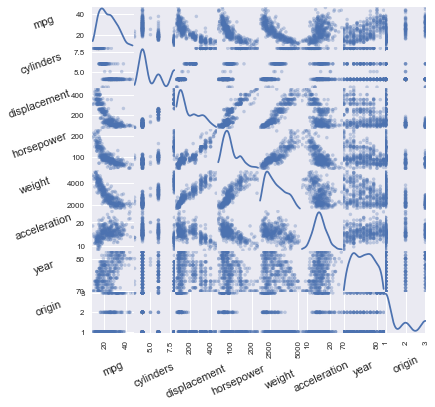

In [8]:
#Produce a sactter matrix for all the quantitiative varialbes
subplots = scatter_matrix(auto_quant, alpha=0.3, figsize=(6, 6), diagonal='kde')
for i in range(8):
    for j in range(8):
        subplot = subplots[i, j]  
        subplot.xaxis.label.set_rotation(25) 
        subplot.xaxis.labelpad = 10
        subplot.yaxis.label.set_rotation(20)
        subplot.yaxis.labelpad = 30
plt.show()

### (c)

In [9]:
# Compute the correlation matrix for the quantitiative variables
auto_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


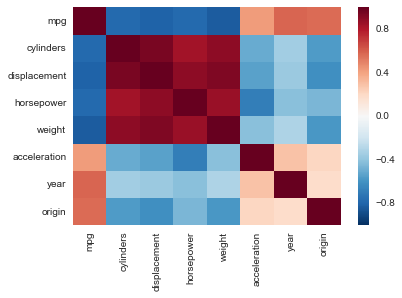

In [10]:
sb.heatmap(auto_quant.corr())

### (d)

In [11]:
# Estimate the multiple linear regression model of mpg on all other quantitative variables
auto_quant["const"] = 1
reg1 = sm.OLS(endog=auto_quant["mpg"], exog=auto_quant[["const", "cylinders", "displacement", \
                                                        "horsepower","weight", "acceleration", \
                                                        "year", "origin"]], missing="drop")
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        22:33:51   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

i. The coefficients of "displacement", "weight", "year", "origin" are statistically significant at the 1% level. The constant/intercept is also statistically significant at the 1% level.

ii. The coefficients of "cylinders", "horsepower", "acceleration" are not statistically signifiant at the 10% level.

iii. If we change "year" by 1 (unit), we’d expect "mpg", i.e. miles per gallon, to increase by 0.7508.

### (e)

i.

The three variables that look most likely to have a nonlinear relationship with "mpg" are "displacement", "horsepower", and "weight".

In [12]:
# Fit a multiple regression model with squared terms
for nonlinear_var in ["displacement", "horsepower", "weight", "acceleration"]:
    col_name = nonlinear_var + "_squared"
    auto_quant[col_name] = auto_quant[nonlinear_var].apply(lambda x: x**2)

auto_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,const,displacement_squared,horsepower_squared,weight_squared,acceleration_squared
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,94249.0,16900.0,12278016,144.00
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,122500.0,27225.0,13638249,132.25
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,101124.0,22500.0,11806096,121.00
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,92416.0,22500.0,11785489,144.00
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,91204.0,19600.0,11895601,110.25


In [13]:
reg2 = sm.OLS(endog=auto_quant["mpg"], exog=auto_quant[["const", "cylinders", "displacement",
                                                        "displacement_squared", "horsepower",
                                                        "horsepower_squared", "weight", "weight_squared", 
                                                        "acceleration", "acceleration_squared", "year", 
                                                        "origin"]], missing="drop")
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        22:34:00   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.1084 

ii. The adjusted R-squared statistic is 0.866, which is better than the adjusted R-squared, 0.818, from part (d).

iii. In the previous model without squared terms, the coefficient on "displacement", which has 0.008 as p-value, is statistical significant at the 1% level. However, in this model with squared terms, the coefficient on "displacement" has a very large p-value, 0.408, which is no longer sigficiant. The coefficient on its squared term also has a very large p-value, 0.532, which indicates non-sigficiance as well. 

iv. In the previous model without squared terms, the coefficient on "cylinders", which has 0.128 as p-value, is not statistical significant. In this model with squared terms, the coefficient on "cylinders" has a larger p-value, 0.440, which is not sigficiant as well. In addition, the sign of the coefficient on "cylinders" changed from negative (-0.4934) to positive (0.2519).

### (f)

In [14]:
results2.predict(exog=[1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15.1, 15.1**2, 99, 1])

array([ 38.73211109])

The predicted miles per gallon "mpg" of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3100, acceleration of 15.1, model year of 1999, and origin of 1 is about 38.7321.

## 2. Classification problem: KNN

### (a)

In [15]:
# Compute the Euclidean distance between each observation and the test point X1=X2=X3=0
obs_dict = {"X1":   [0, 2, 0, 0, -1, 1],
            "X2":   [3, 0, 1, 1,  0, 1],
            "X3":   [0, 0, 3, 2,  1, 1],
            "Y":    ["Red", "Red", "Red", "Green", "Green", "Red"]}
obs_dict = pd.DataFrame(obs_dict)
obs_dict["Eucl.Dist."] = np.sqrt( obs_dict["X1"]**2 + obs_dict["X2"]**2 + obs_dict["X3"]**2 )
print(obs_dict)

   X1  X2  X3      Y  Eucl.Dist.
0   0   3   0    Red    3.000000
1   2   0   0    Red    2.000000
2   0   1   3    Red    3.162278
3   0   1   2  Green    2.236068
4  -1   0   1  Green    1.414214
5   1   1   1    Red    1.732051


### (b)

When $K$ = 1, the $KNN$ prediction is green, because from the Euclidean distance, we know the closest point to the test point (0, 0, 0) is (-1, 0, 1). There is a smallest Euclidean distance of 1.4142 between these two points. Therefore, the prediction for (0, 0, 0) is green.

### (c)

When $K$ = 3, the $KNN$ prediction is red, because from the Euclidean distance, we know the three closest point to the test point (0, 0, 0) is (-1, 0, 1), (1, 1, 1), and (2, 0, 0). The Euclidean distance between them and (0, 0, 0) are 1.4142, 1,7320, and 2.000 respectively. Among these three points, two of them are red while one is green. Therefore, the prediction is red.

### (d)

If the Bayes decison boundary is highly non-liner, we would expect the best value for $K$ to be small. When the $K$ is small, the decision boundary has more contours than the case with a large $K$; when $K$ is large, the prediction boundary would be more smooth, linear, and have less contours. A prediction boundary with a large $K$ may underfit the data in this case. The prediciton boundary with a small $K$ would allow more variance and reduce bias, which would be closer to the Bayes decision boundary.

### (e)

In [16]:
# Estimate the KNN classifier of the test point (1, 1, 1) with K=2
X_train = obs_dict[["X1", "X2", "X3"]]
y_train = obs_dict.Y
X_test = [[1, 1, 1]]
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array(['Green'], dtype=object)

Using Python's scikit-learn libray, the KNN classifier of the test point (1, 1, 1) with $K$ = 2 is green. 

## 3. Mulvariable logistic (logit) regression

In [18]:
# Create a binary variable mpg_high
mpg_med= auto_quant["mpg"].median()
auto_quant["mpg_high"] = auto_quant["mpg"].apply(lambda x: 1 if x >= mpg_med else 0)

### (a)

In [19]:
# Estimate the logistic regression of mpg_high on the cyl, dspl, hpwr, wgt, accl, yr, and orgn
X = auto_quant[["const","cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]]
y = auto_quant["mpg_high"]
LogitModel = sm.Logit(y, X)
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sat, 03 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        22:34:19   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The regressors that have coefficients that are statistically significant at the 5% level are "weight" and "year".

### (b)

In [20]:
#Divide the data into a training set of half of the data randomly selected and a a test set 
X_train, X_test, y_train, y_test = \
    train_test_split(X.iloc[:, 1:], y, test_size = 0.5, random_state = 10)

### (c)

In [21]:
# Estimate a logistic regression model on the training data
LogReg = LogisticRegression()
results3 = LogReg.fit(X_train, y_train)

In [22]:
LogReg.intercept_

array([-0.07596481])

The estimated intercept $\beta_{0}$ is -0.07596.

In [23]:
LogReg.coef_

array([[-0.72681463,  0.00705551, -0.03593928, -0.0051099 , -0.12419645,
         0.29763985, -0.1626257 ]])

The estimated coefficient $\beta_{1}$ is -0.72681.

The estimated coefficient $\beta_{2}$ is  0.00706.

The estimated coefficient $\beta_{3}$ is -0.03594.

The estimated coefficient $\beta_{4}$ is -0.00511.

The estimated coefficient $\beta_{5}$ is -0.12419.

The estimated coefficient $\beta_{6}$ is  0.29764.

The estimated coefficient $\beta_{7}$ is -0.16263.

### (d)

In [24]:
#Create predicted values of mpg_high for the test set
y_pred = LogReg.predict(X_test)
print("The predicted values of mpg_high for the test set are:")
y_pred

The predicted values of mpg_high for the test set are:


array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [25]:
# Calculate the confusion_matrix for the Logit model on the test data
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [26]:
# Calculate the classification report for the Logit model on the test data
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



The confusion matrix tells us that 86 and 85 are the number of correct predictions. 12 and 13 are the number of incorrect predictions.

The classification report tells us that this model predicts low mpg (mpg_high = 0) a little bit better than that of high mpg (mpg_high = 1). However, the difference is small.